# Wasserstein variable projection: understanding regression models    
    


In [1]:
import numpy as np                     
import sklearn as sk                   
import matplotlib.pyplot as plt        
import pandas as pd                    
from tqdm import tqdm                  
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


## 1: Load Boston Housing data

In [31]:
from pandas import read_csv

In [32]:
data = read_csv('/Users/user/wass_projec/LEFkit/data/Boston.csv')

In [33]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [34]:
data = data.drop('Unnamed: 0', axis=1)

### 1.1 preprocess data

In [35]:
n=len(data)
X = data
Y = data['medv']

In [36]:
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [37]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [18]:
n

506

In [38]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
220,0.35809,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307,17.4,9.71,26.7
71,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,9.88,21.7
240,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,11.38,22.0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
417,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,26.64,10.4


## 2: Train different regressors 

### 2.1 Linear regression 

In [39]:
import statsmodels.formula.api as smf

In [40]:
features_to_use = [feature for feature in X_train.columns if feature != "medv"]
print(features_to_use)

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']


In [41]:
formula = "medv~" + "+".join(features_to_use)
print(formula)

medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat


In [42]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
220,0.35809,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307,17.4,9.71,26.7
71,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,9.88,21.7
240,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,11.38,22.0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
417,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,26.64,10.4


In [43]:
lm = smf.ols(formula, data=X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     108.2
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          3.70e-116
Time:                        20:15:42   Log-Likelihood:                -1175.3
No. Observations:                 404   AIC:                             2377.
Df Residuals:                     391   BIC:                             2429.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6490      5.312      8.029      0.0

In [44]:
predict_lr = lm.predict(X_test)

In [45]:
rmse = np.sqrt(np.mean((predict_lr-Y_test)**2))
rmse

5.864730468201269

### 2.2 Gradient boosting <a name="a-DT"></a>

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
220,0.35809,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307,17.4,9.71,26.7
71,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,9.88,21.7
240,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,11.38,22.0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
417,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,26.64,10.4


In [48]:
X_train = X_train.drop('medv', axis=1)
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
220,0.35809,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307,17.4,9.71
71,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,9.88
240,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,11.38
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43
417,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,26.64


In [52]:
X_test = X_test.drop('medv', axis=1)
X_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430,16.9,7.34
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,9.53
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,10.50
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,19.77
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,12.34


In [53]:
reg_GB=GradientBoostingRegressor(max_depth=2)
reg_GB.fit(X_train,Y_train)

GradientBoostingRegressor(max_depth=2)

In [54]:
prev_GB = reg_GB.predict(X_test)
rmse = np.sqrt(np.mean((prev_GB-Y_test)**2))
rmse

4.746241772023233

### 2.4 1-layer neural network

In [55]:
import tensorflow.keras as tk
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [56]:
dropout_rate = 0.4
first_layout = 50
epochs = 150
batch_size = 32
activation = 'relu'
loss = 'mean_squared_error'
optimizer = 'adam'
metrics = ['mae']

In [57]:
X_train.shape[1]

12

In [58]:
model = Sequential()
model.add(Dropout(rate=dropout_rate, input_shape=(X_train.shape[1],)))
model.add(Dense(first_layout, activation=activation))
model.add(Dropout(rate=dropout_rate, input_shape=(X_train.shape[1],)))
model.add(Dense(1))
model.add(Dropout(rate=dropout_rate, input_shape=(X_train.shape[1],)))
# model.add(Dense(first_layout, activation=activation))
# model.add(Dropout(rate=dropout_rate, input_shape=(X_train.shape[1],)))
# model.add(Dense(1))
# model.add(Dropout(rate=dropout_rate, input_shape=(X_train.shape[1],)))
# model.add(Dense(first_layout, activation=activation))
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [59]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense (Dense)               (None, 50)                650       
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
 dropout_2 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
model.fit(X_train.astype('float32'), Y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/150
13/13 [==============================] - 2s 3ms/step - loss: 43896.7773 - mae: 115.4074
Epoch 2/150
13/13 [==============================] - 0s 2ms/step - loss: 28947.8438 - mae: 92.4630
Epoch 3/150
13/13 [==============================] - 0s 2ms/step - loss: 17346.2754 - mae: 74.0937
Epoch 4/150
13/13 [==============================] - 0s 3ms/step - loss: 13600.3721 - mae: 66.6489
Epoch 5/150
13/13 [==============================] - 0s 3ms/step - loss: 9737.8887 - mae: 55.5897
Epoch 6/150
13/13 [==============================] - 0s 3ms/step - loss: 9741.3018 - mae: 58.0798
Epoch 7/150
13/13 [==============================] - 0s 3ms/step - loss: 9999.1016 - mae: 61.8062
Epoch 8/150
13/13 [==============================] - 0s 2ms/step - loss: 9571.5166 - mae: 58.9710
Epoch 9/150
13/13 [==============================] - 0s 2ms/step - loss: 7002.3442 - mae: 51.7087
Epoch 10/150
13/13 [==============================] - 0s 3ms/step - loss: 6863.4668 - mae: 51.6774
Epoch 11/150
1

In [61]:
mse_test, mae_test = model.evaluate(X_test.astype('float32'), Y_test)
print(f"Test rmse: {np.sqrt(mse_test)}, Test mae: {mae_test}")

4/4 [==============================] - 0s 6ms/step - loss: 338.1248 - mae: 16.0607
Test rmse: 18.38817139935642, Test mae: 16.06073760986328


### 2.5 Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf_reg = RandomForestRegressor(random_state=0, n_estimators=100)
rf_reg.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [64]:
predict_rf = rf_reg.predict(X_test)
rmse = np.sqrt(np.mean((predict_rf-Y_test)**2))
rmse

4.325195299908775

### 3. Compute mean prediction wrt tau

In [65]:
from regression_functions import *

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


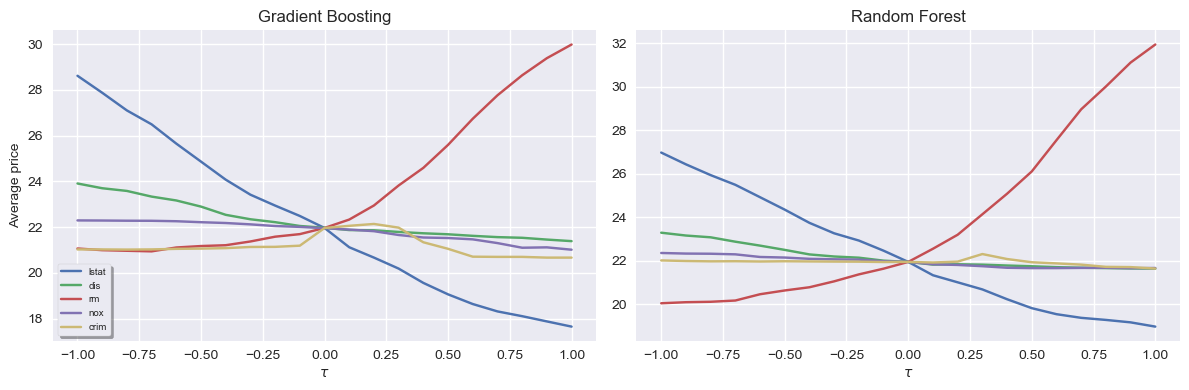

In [66]:
plot_multiplemean_reg(X_train, X_test, Y_train, 21, 0.05)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


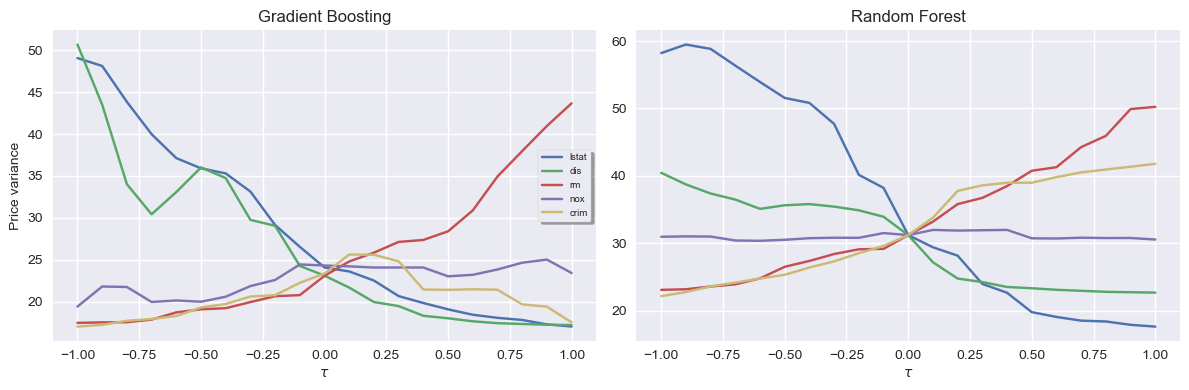

In [11]:
plot_multiplemean_reg_var(X_train, X_test, Y_train, 21, 0.05)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


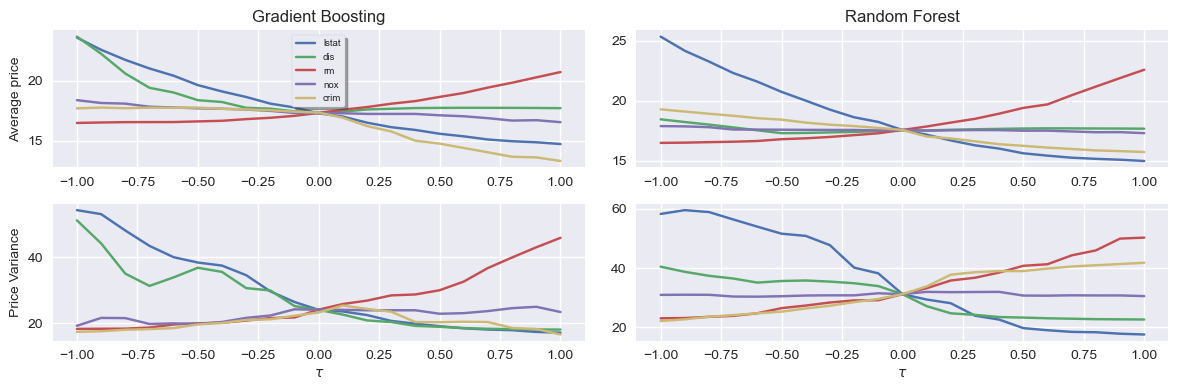

In [8]:
quatro_figs(X_train, X_test, Y_train, 21, 0.05)

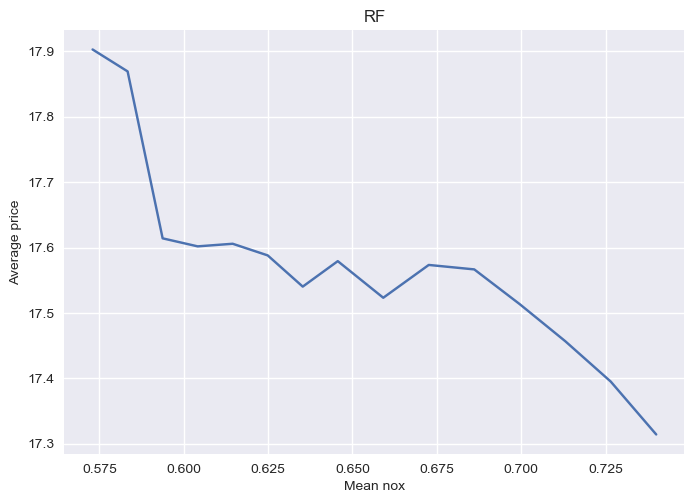

In [11]:
plot_mean_reg(X_train, X_test, Y_train, 15, 0.05, 'nox', 'RF')